In [2]:
# Installing library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [6]:
df.describe

<bound method NDFrame.describe of              uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbik

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [8]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
#Types of viariables

numerical_vars = df.select_dtypes(include=[np.number]).columns
numerical_vars

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [11]:
categorical_vars = df.select_dtypes(include=['object']).columns
categorical_vars

Index(['asin', 'title', 'category'], dtype='object')

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [12]:
pd.crosstab(df['category'], df['isBestSeller'], margins=True)

isBestSeller,False,True,All
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Window Treatments,234,5,239
Women,17559,213,17772
Women's Sports & Outdoor Shoes,1939,20,1959


In [13]:
crosstab_prop = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')
crosstab_prop

isBestSeller,False,True
category,,
3D Printers,0.995968,0.004032
3D Printing & Scanning,0.999508,0.000492
Abrasive & Finishing Products,0.980000,0.020000
Action Cameras,0.999411,0.000589
Adapters,0.988189,0.011811
...,...,...
Wind Instruments,0.972000,0.028000
Window Treatments,0.979079,0.020921
Women,0.988015,0.011985


In [14]:
bestseller_proportion = crosstab_prop[True].sort_values(ascending=False)
print(bestseller_proportion.head(10))

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
Name: True, dtype: float64


In [15]:
bestseller_proportion.index[0]

'Grocery'

Are there categories where being a best-seller is more prevalent? yes : 'Grocery', 'Smart Home Security & Lighting', 'Health & Personal Care'

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [16]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['category'], df['isBestSeller'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi² statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degree of freedom: {dof}")

Chi² statistic: 36540.20270061387
P-value: 0.0
Degree of freedom: 295


In [17]:
if p_value < 0.05:
    print("There is a relation between the variables")
else:
    print("the best-seller distribution is independent of the product category")

There is a relation between the variables


In [18]:
def cramers_v(confusion_matrix):

    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

In [19]:
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])
v = cramers_v(contingency_table)
print(f"Cramér's V: {v:.4f}")

Cramér's V: 0.1223


In [20]:
if v < 0.1:
    strength = "very weak"
elif v < 0.3:
    strength = "weak"
elif v < 0.5:
    strength = "moderate"
else:
    strength = "strong"

print(f"\nThe relation between category and isBestSeller is {strength}.")


The relation between category and isBestSeller is weak.


3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Figure size 1200x600 with 0 Axes>

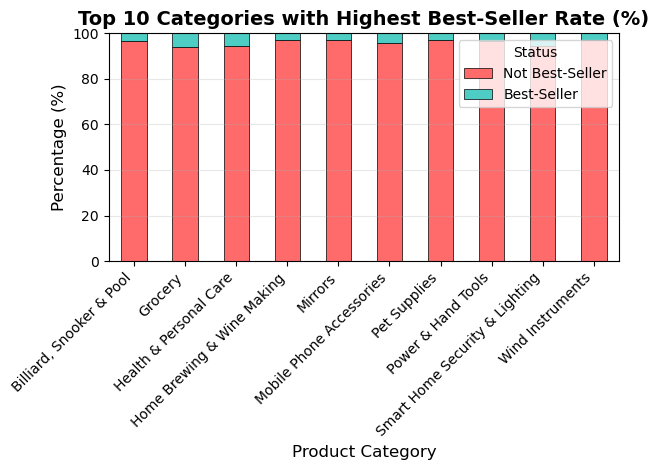

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Get top 10 categories by best-seller rate
bestseller_rate = df.groupby('category')['isBestSeller'].mean()
top_10_categories = bestseller_rate.nlargest(10).index

# Filter dataframe
df_top10 = df[df['category'].isin(top_10_categories)]

# Create normalized crosstab (percentages)
crosstab_pct = pd.crosstab(df_top10['category'], df_top10['isBestSeller'], normalize='index') * 100

# Stacked bar chart with percentages
plt.figure(figsize=(12, 6))
crosstab_pct.plot(
    kind='bar',
    stacked=True,
    color=['#ff6b6b', '#4ecdc4'],
    edgecolor='black',
    linewidth=0.5
)

plt.title('Top 10 Categories with Highest Best-Seller Rate (%)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Not Best-Seller', 'Best-Seller'], title='Status', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [22]:
def tukeys_test_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(len(outliers))
    
    return outliers

In [23]:
outliers = tukeys_test_outliers(df['price'])

Q1: 9.99
Q3: 45.99
IQR: 36.0
lower bound: -44.01
Upper bound: 99.99000000000001
327688


In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[
    (df['price'] >= lower_bound) & 
    (df['price'] <= upper_bound)
    ]

df = df_no_outliers.copy()
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


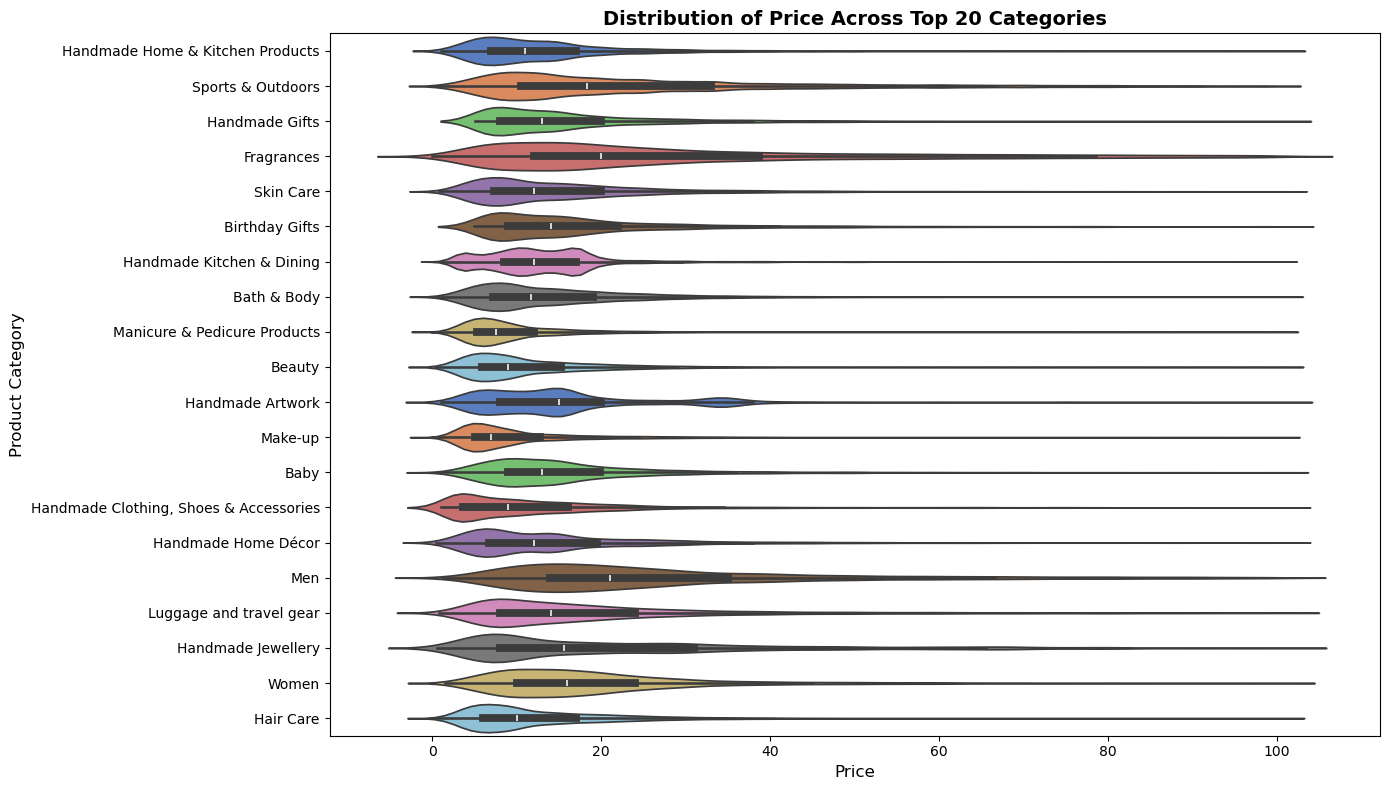

In [25]:
top_20_categories = df['category'].value_counts().head(20).index
df_top20 = df[df['category'].isin(top_20_categories)]

# Violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=df_top20,
    x='price',
    y='category',
    hue='category',     
    palette='muted',
    legend=False         
)
plt.title('Distribution of Price Across Top 20 Categories', 
          fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
median_price_by_category = df.groupby('category')['price'].median().sort_values(ascending=False)

print(median_price_by_category.head(10))

print(f"\nCategory with highest median price: {median_price_by_category.index[0]}")
print(f"   Median price: ${median_price_by_category.iloc[0]:,.2f}")

category
Desktop PCs               74.00
Boxing Shoes              69.79
Tablets                   69.00
Graphics Cards            68.54
Motherboards              67.92
Made in Italy Handmade    64.00
Digital Frames            63.90
Streaming Clients         62.68
Golf Shoes                62.39
Ski Helmets               61.33
Name: price, dtype: float64

Category with highest median price: Desktop PCs
   Median price: $74.00


Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [27]:
top_10_categories = df['category'].value_counts().head(10).index
df_top10 = df[df['category'].isin(top_10_categories)]

In [29]:
average_price_top10 = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)
average_price_top10

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

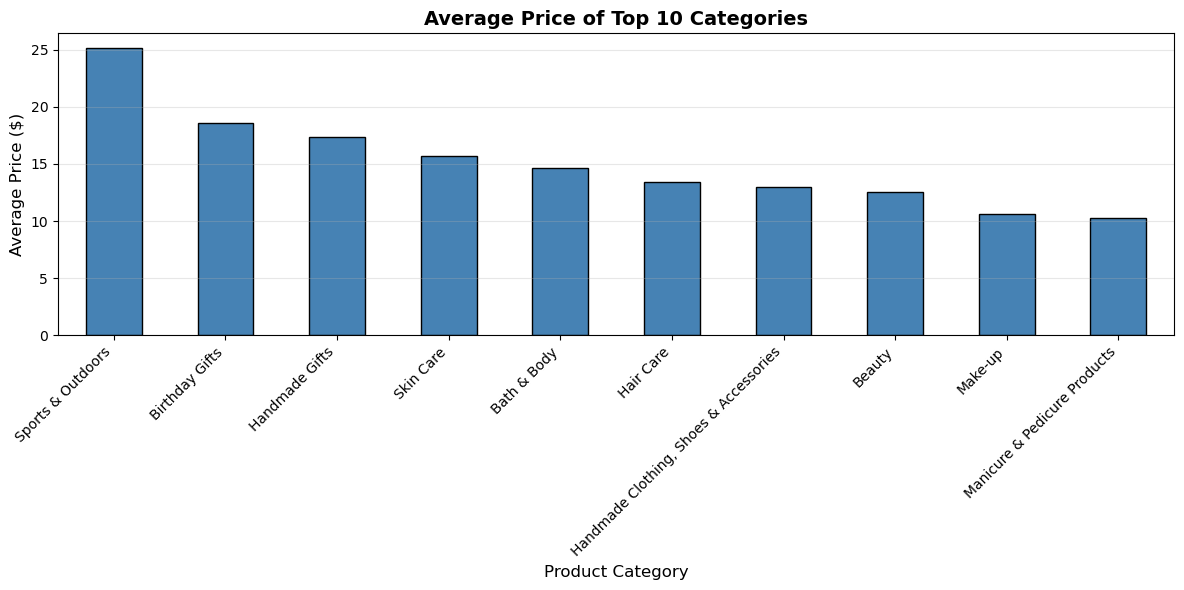

In [33]:
plt.figure(figsize=(12, 6))
average_price_top10.plot(
    kind='bar',
    color='steelblue',
    edgecolor='black'
)
plt.title('Average Price of Top 10 Categories', 
          fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
average_price_all = df.groupby('category')['price'].mean().sort_values(ascending=False)
print(f"Category with highest average price: {average_price_all.index[0]}")
print(f"Average price: ${average_price_all.iloc[0]:,.2f}")

Category with highest average price: Motherboards
Average price: $68.77


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


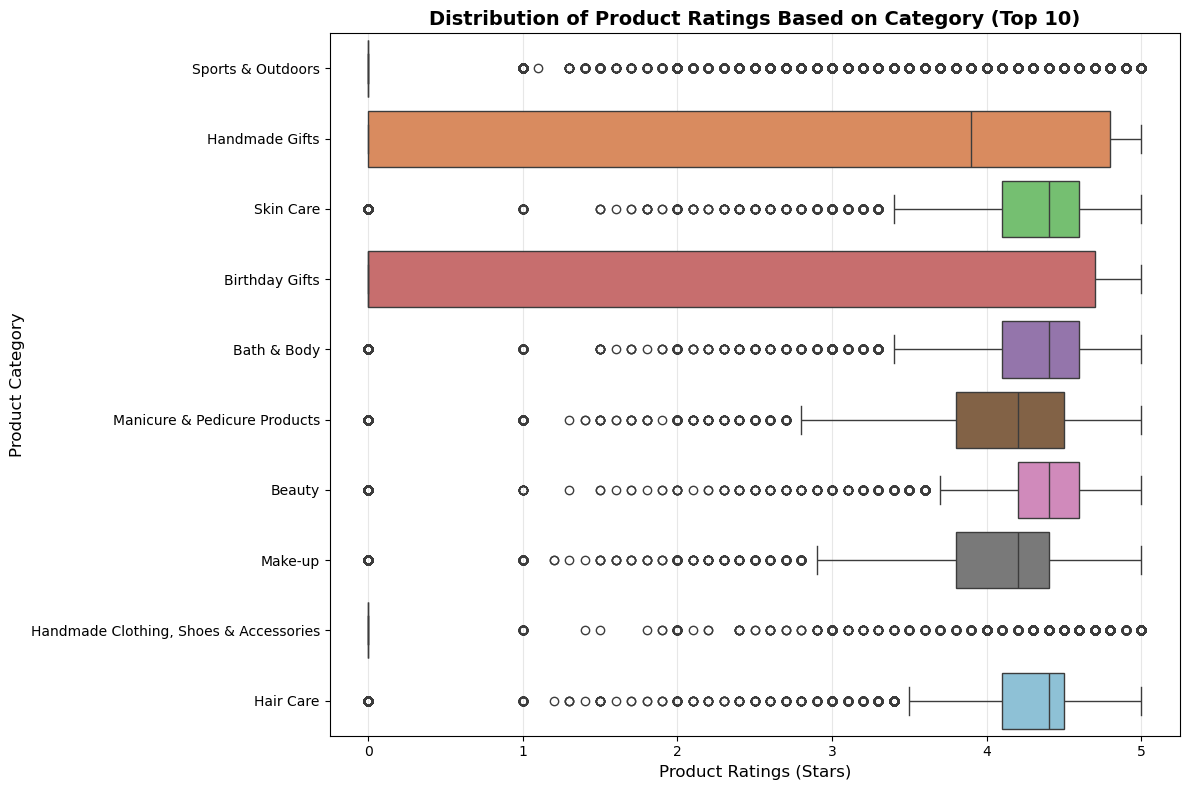

In [38]:
top_10_categories = df['category'].value_counts().head(10).index
df_top10 = df[df['category'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_top10,
    x='stars',   
    y='category',        
    hue='category',     
    palette='muted',
    legend=False         
)
plt.title('Distribution of Product Ratings Based on Category (Top 10)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Product Ratings (Stars)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
median_rating_all = df.groupby('category')['stars'].median().sort_values(ascending=False)
print(f"\nCategory with highest median rating: {median_rating_all.index[0]}")
print(f"Median: {median_rating_all.iloc[0]:.2f} stars")


Category with highest median rating: Computer Memory
Median: 4.70 stars


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot.

In [43]:
correlation = df['stars'].corr(df['price'])
correlation

np.float64(-0.0776729987818131)

Correlation between stars and price: -0.0777

- Interpretation: negative very weak (negligible) correlation
- Conclusion: There is almost NO relationship between price and ratings.

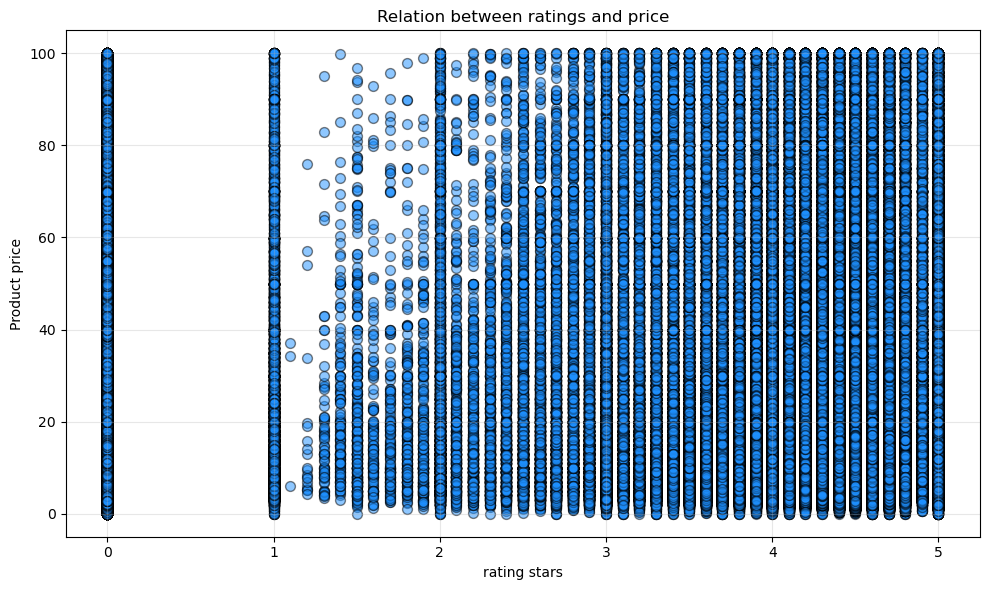

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['stars'],
    df['price'],
    alpha=0.5,        
    color='dodgerblue',
    edgecolor='black',
    s=50             
)
plt.title('Relation between ratings and price')
plt.xlabel('rating stars')
plt.ylabel('Product price')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

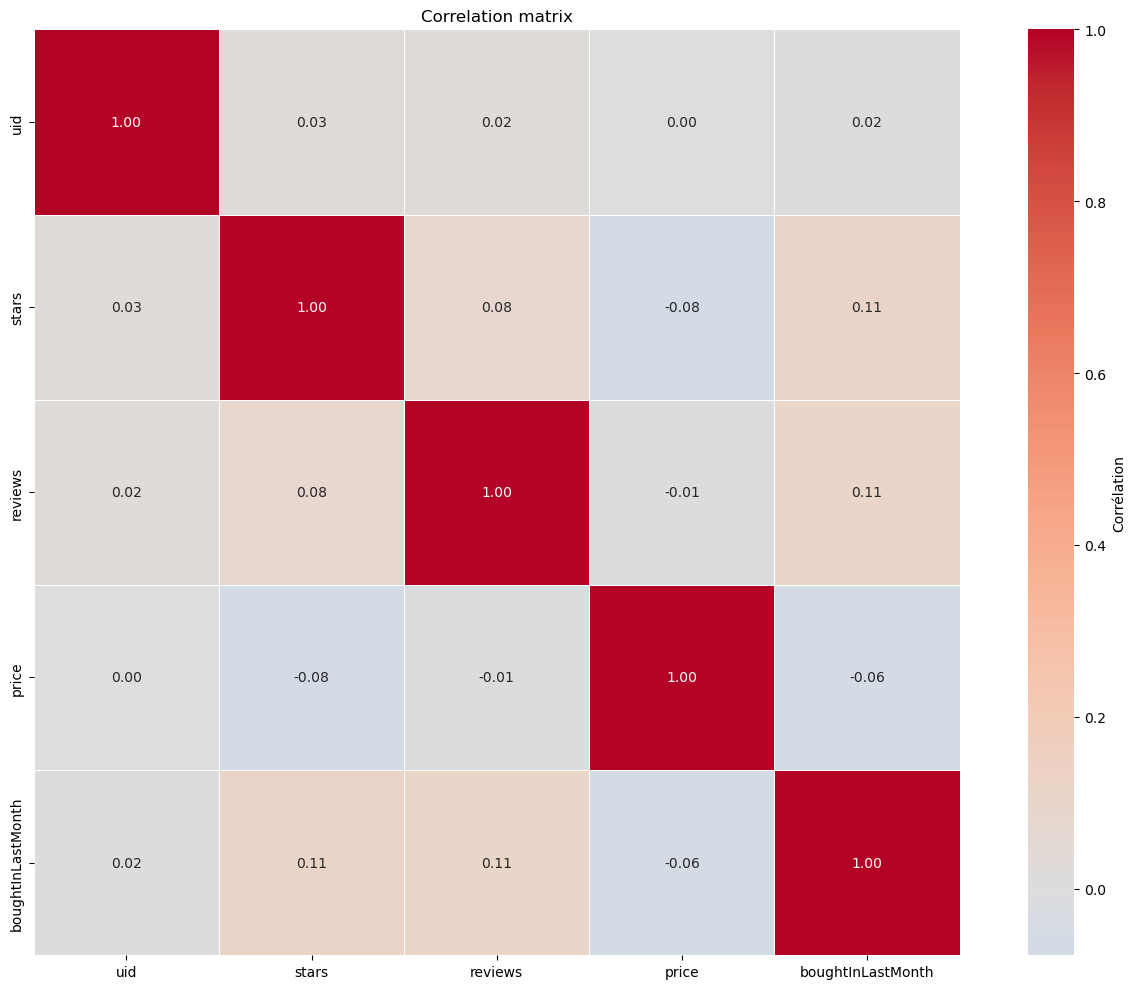

In [51]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()


plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,          
    fmt='.2f',           
    cmap='coolwarm',     
    center=0,            
    square=True,         
    linewidths=0.5,      
    cbar_kws={'label': 'Corrélation'}
)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

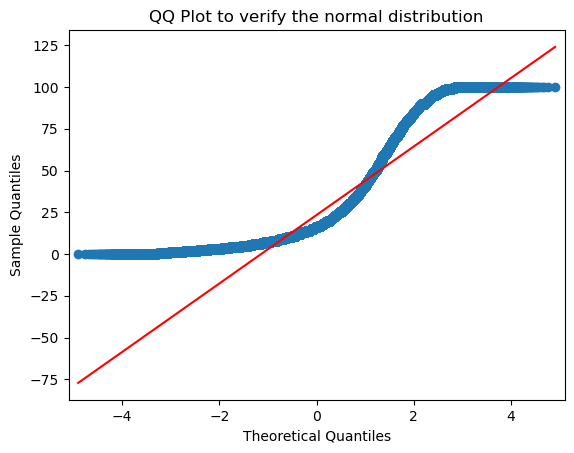

In [52]:
import statsmodels.api as sm

sm.qqplot(df['price'], line='s')
plt.title('QQ Plot to verify the normal distribution')
plt.show()

No, product prices do not follow a normal distribution. The QQ plot reveals a right-skewed distribution with significant deviations in both tails, particularly in the upper tail where extreme high prices create outliers. This is typical for e-commerce price data.